In [1]:
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import keras
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
import visualkeras

In [2]:
with_mask='data/with_mask'
without_mask='data/without_mask'
pd.DataFrame([len(os.listdir(with_mask)),len(os.listdir(without_mask))],columns=['Number'],index=['with_mask','without_mask'])

Number
with_mask       3725
without_mask    3828

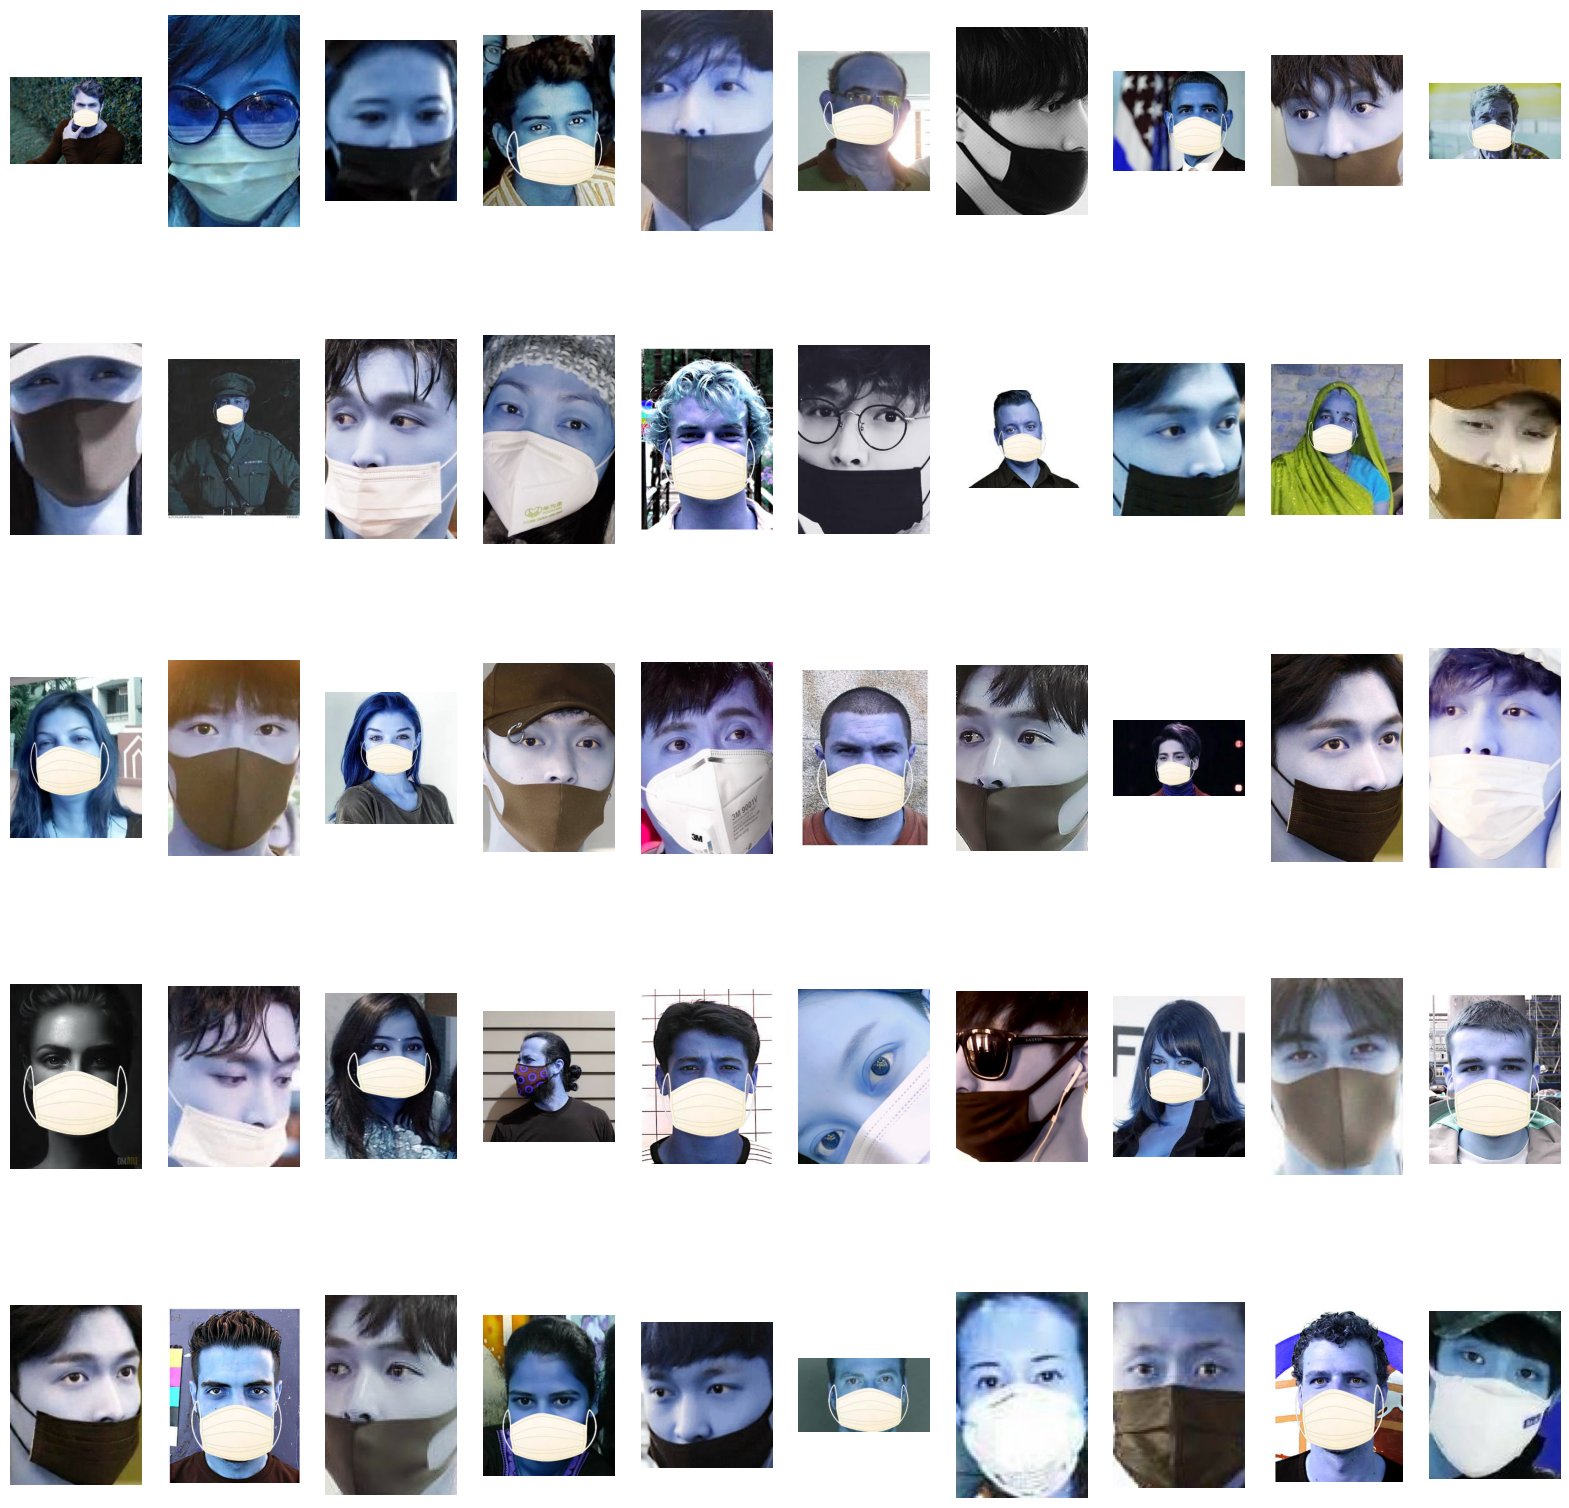

In [3]:
#Show With Mask Image
i=1
plt.figure(figsize=(20,20))
for img in os.listdir(with_mask):
    if i==51:
        break
    plt.subplot(5,10,i)
    img_arr=cv2.imread(os.path.join(with_mask,img))
    plt.imshow(img_arr)
    i+=1
    plt.axis('off')

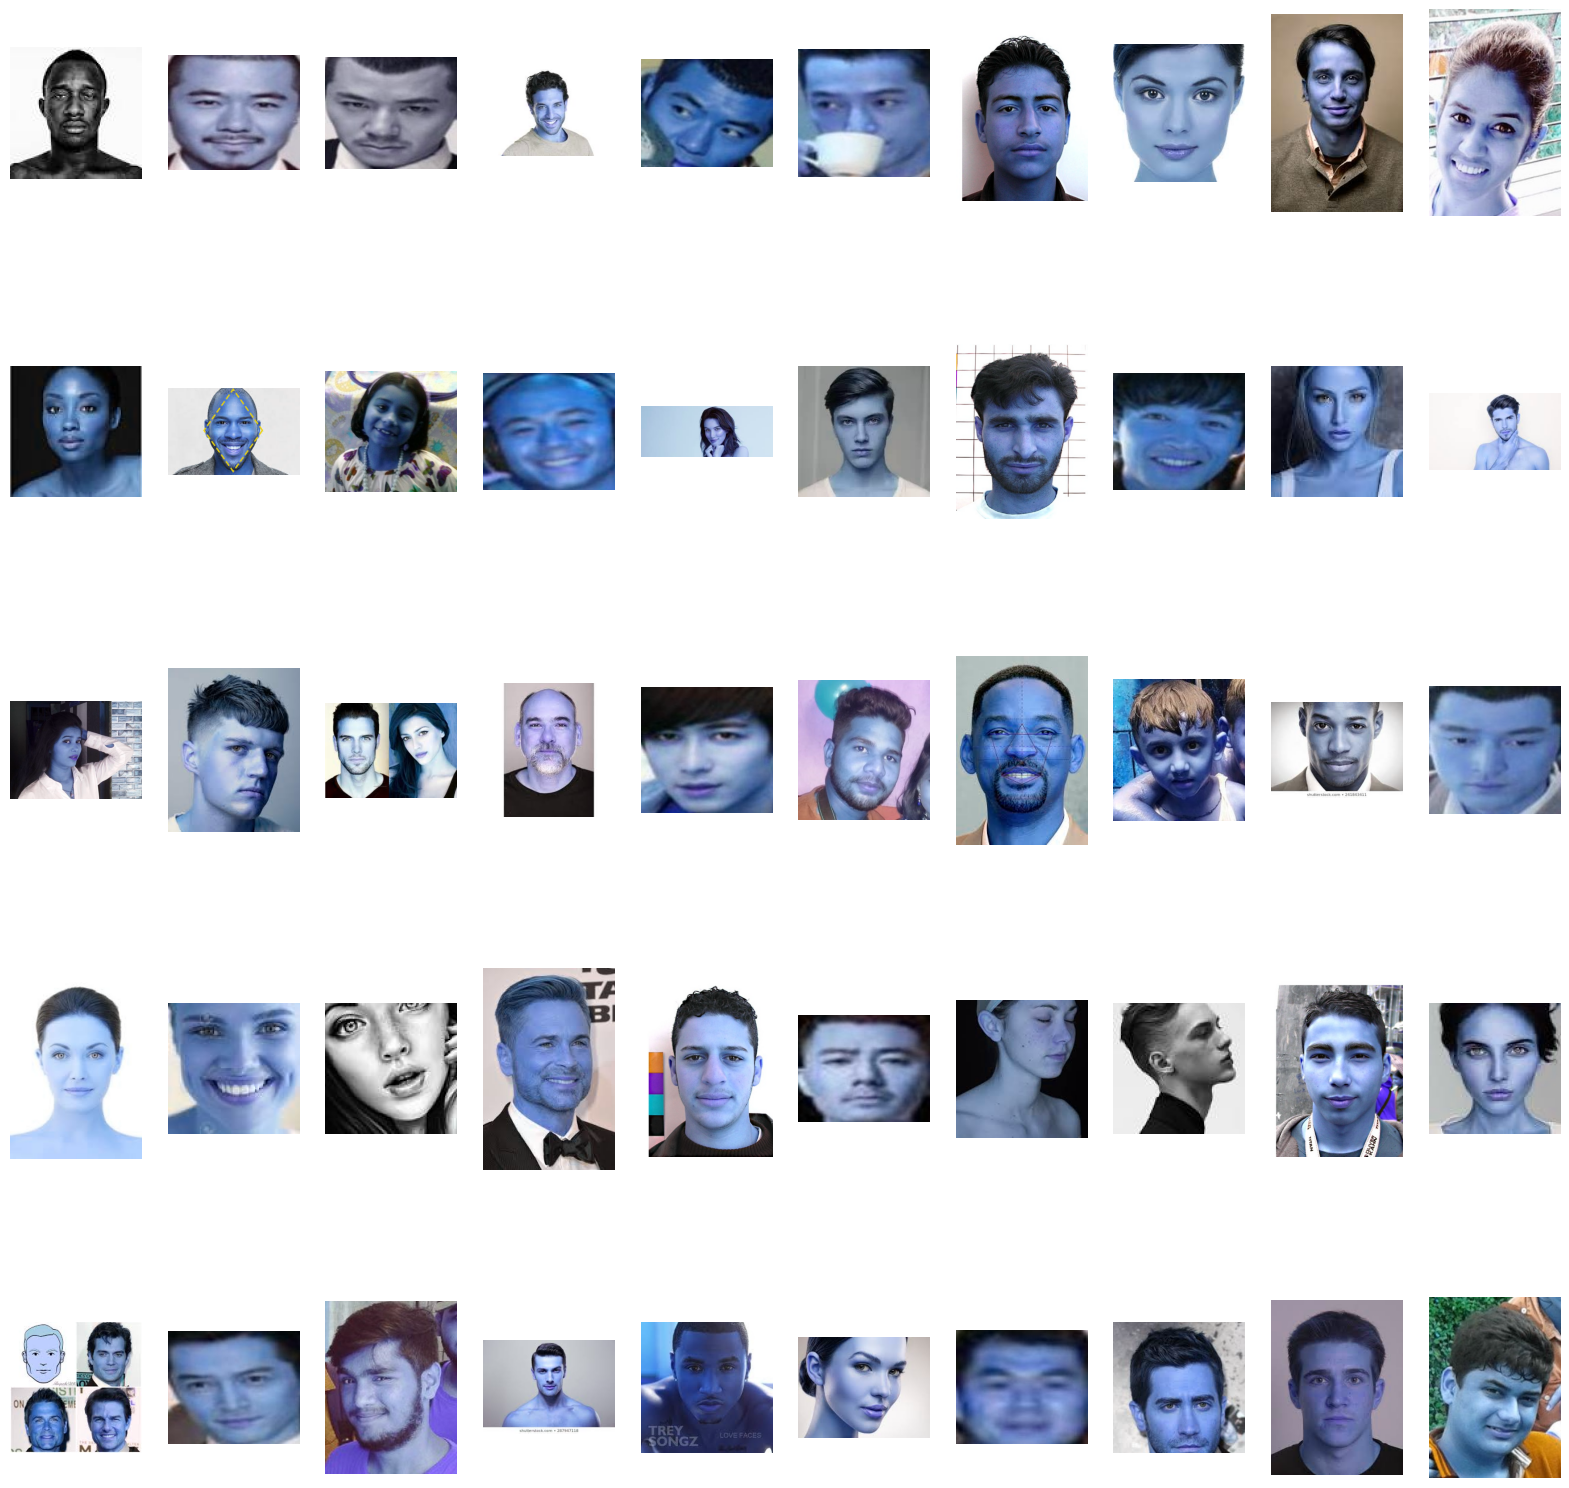

In [4]:
#Show Without Mask Image
i=1
plt.figure(figsize=(20,20))
for img in os.listdir(without_mask):
    if i==51:
        break
    plt.subplot(5,10,i)
    img_arr=cv2.imread(os.path.join(without_mask,img))
    plt.imshow(img_arr)
    i+=1
    plt.axis('off')

In [5]:
label=[]
data=[]
size=[]
#with mask label 1
for img in os.listdir(with_mask):
    img_arr=cv2.imread(os.path.join(with_mask,img))
    data.append(img_arr)
    label.append(1)
    size.append(img_arr.shape)
#without mask label 0
for img in os.listdir(without_mask):
    img_arr=cv2.imread(os.path.join(without_mask,img))
    data.append(img_arr)
    label.append(0)
    size.append(img_arr.shape)

In [6]:
pd.DataFrame(pd.Series(size).value_counts(),columns=['Number'])  

Empty DataFrame
Columns: [Number]
Index: []

In [7]:
#Resize Image
Size=128
for x in range(len(data)):
    data[x]=cv2.resize(data[x],(Size,Size))

In [8]:
data=np.array(data)
label=np.array(label)
X_train,X_test,y_train,y_test=train_test_split(data,label,test_size=.15,shuffle=True,random_state=44)
print('X Train Shape is :',X_train.shape)
print('X Test Shape is :',X_test.shape)
print('Y Train Shape is :',y_train.shape)
print('Y Test Shape is :',y_test.shape)

X Train Shape is : (6420, 128, 128, 3)
X Test Shape is : (1133, 128, 128, 3)
Y Train Shape is : (6420,)
Y Test Shape is : (1133,)


In [9]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation=tf.nn.relu,input_shape=(Size,Size,3)))
model.add(keras.layers.MaxPooling2D((3,3)))
model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation=tf.nn.relu))
model.add(keras.layers.MaxPooling2D((3,3)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(2, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 42, 42, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [11]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=10,validation_split = 0.1)

Epoch 1/10
181/181 [==============================] - 49s 261ms/step - loss: 1.7828 - accuracy: 0.7899 - val_loss: 0.3300 - val_accuracy: 0.8769
Epoch 2/10
181/181 [==============================] - 47s 260ms/step - loss: 0.2851 - accuracy: 0.8877 - val_loss: 0.2430 - val_accuracy: 0.9034
Epoch 3/10
181/181 [==============================] - 48s 264ms/step - loss: 0.2287 - accuracy: 0.9098 - val_loss: 0.2361 - val_accuracy: 0.9143
Epoch 4/10
181/181 [==============================] - 49s 270ms/step - loss: 0.2067 - accuracy: 0.9232 - val_loss: 0.2384 - val_accuracy: 0.9237
Epoch 5/10
181/181 [==============================] - 49s 272ms/step - loss: 0.1767 - accuracy: 0.9337 - val_loss: 0.2260 - val_accuracy: 0.9065
Epoch 6/10
181/181 [==============================] - 49s 273ms/step - loss: 0.1440 - accuracy: 0.9465 - val_loss: 0.2470 - val_accuracy: 0.9315
Epoch 7/10
181/181 [==============================] - 50s 274ms/step - loss: 0.1332 - accuracy: 0.9522 - val_loss: 0.2019 - val_ac

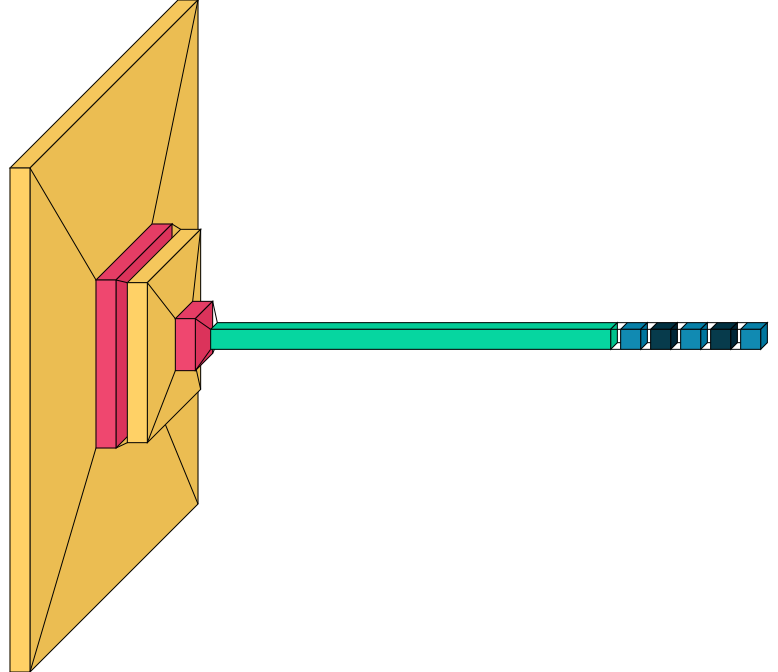

In [13]:
visualkeras.layered_view(model, legend=True)
visualkeras.layered_view(model, to_file='CNN_architecture.png')

In [15]:
hist=pd.DataFrame(hist.history)
hist

loss  accuracy  val_loss  val_accuracy
0  3.032885  0.710107  0.405337      0.823988
1  0.373657  0.853063  0.365364      0.880062
2  0.303452  0.881966  0.302712      0.894081
3  0.262661  0.890793  0.331045      0.873832
4  0.242023  0.904465  0.300403      0.883178
5  0.178583  0.930772  0.289639      0.895639
6  0.180667  0.928868  0.329083      0.886293
7  0.148655  0.941502  0.338473      0.892523
8  0.171581  0.931983  0.313805      0.892523
9  0.132682  0.949463  0.263676      0.890966

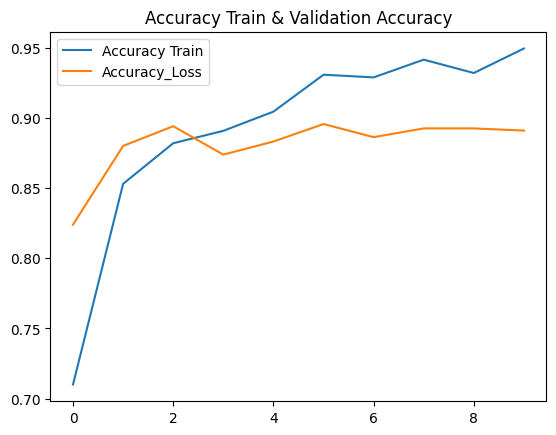

In [16]:
plt.plot(hist['accuracy'],label='Accuracy Train')
plt.plot(hist['val_accuracy'],label='Accuracy_Loss')
plt.title('Accuracy Train & Validation Accuracy')
plt.legend()

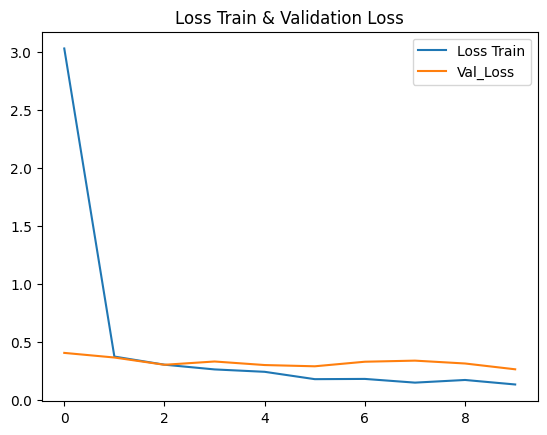

In [17]:
plt.plot(hist['loss'],label='Loss Train')
plt.plot(hist['val_loss'],label='Val_Loss')
plt.title('Loss Train & Validation Loss')
plt.legend()

In [18]:
score, acc = model.evaluate(X_test, y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

36/36 [==============================] - 3s 75ms/step - loss: 0.2708 - accuracy: 0.9223
Test Loss = 0.2707720100879669
Test Accuracy = 0.9223300814628601


In [19]:
prediction = model.predict(X_test)
prediction

36/36 [==============================] - 3s 76ms/step


array([[7.4791843e-01, 2.5208163e-01],
       [9.9958462e-01, 4.1533398e-04],
       [2.4093984e-02, 9.7590601e-01],
       ...,
       [1.8568526e-08, 1.0000000e+00],
       [9.9857855e-01, 1.4214931e-03],
       [5.3970505e-02, 9.4602948e-01]], dtype=float32)

In [20]:
pred_label=[]
for row in prediction:
    N=np.argmax(row)
    if N==1:
        pred_label.append('with mask')
    else:
        pred_label.append('without mask')
pd.DataFrame(pred_label,columns=['Prediction'])

Prediction
0     without mask
1     without mask
2        with mask
3     without mask
4        with mask
...            ...
1128  without mask
1129     with mask
1130     with mask
1131  without mask
1132     with mask

[1133 rows x 1 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

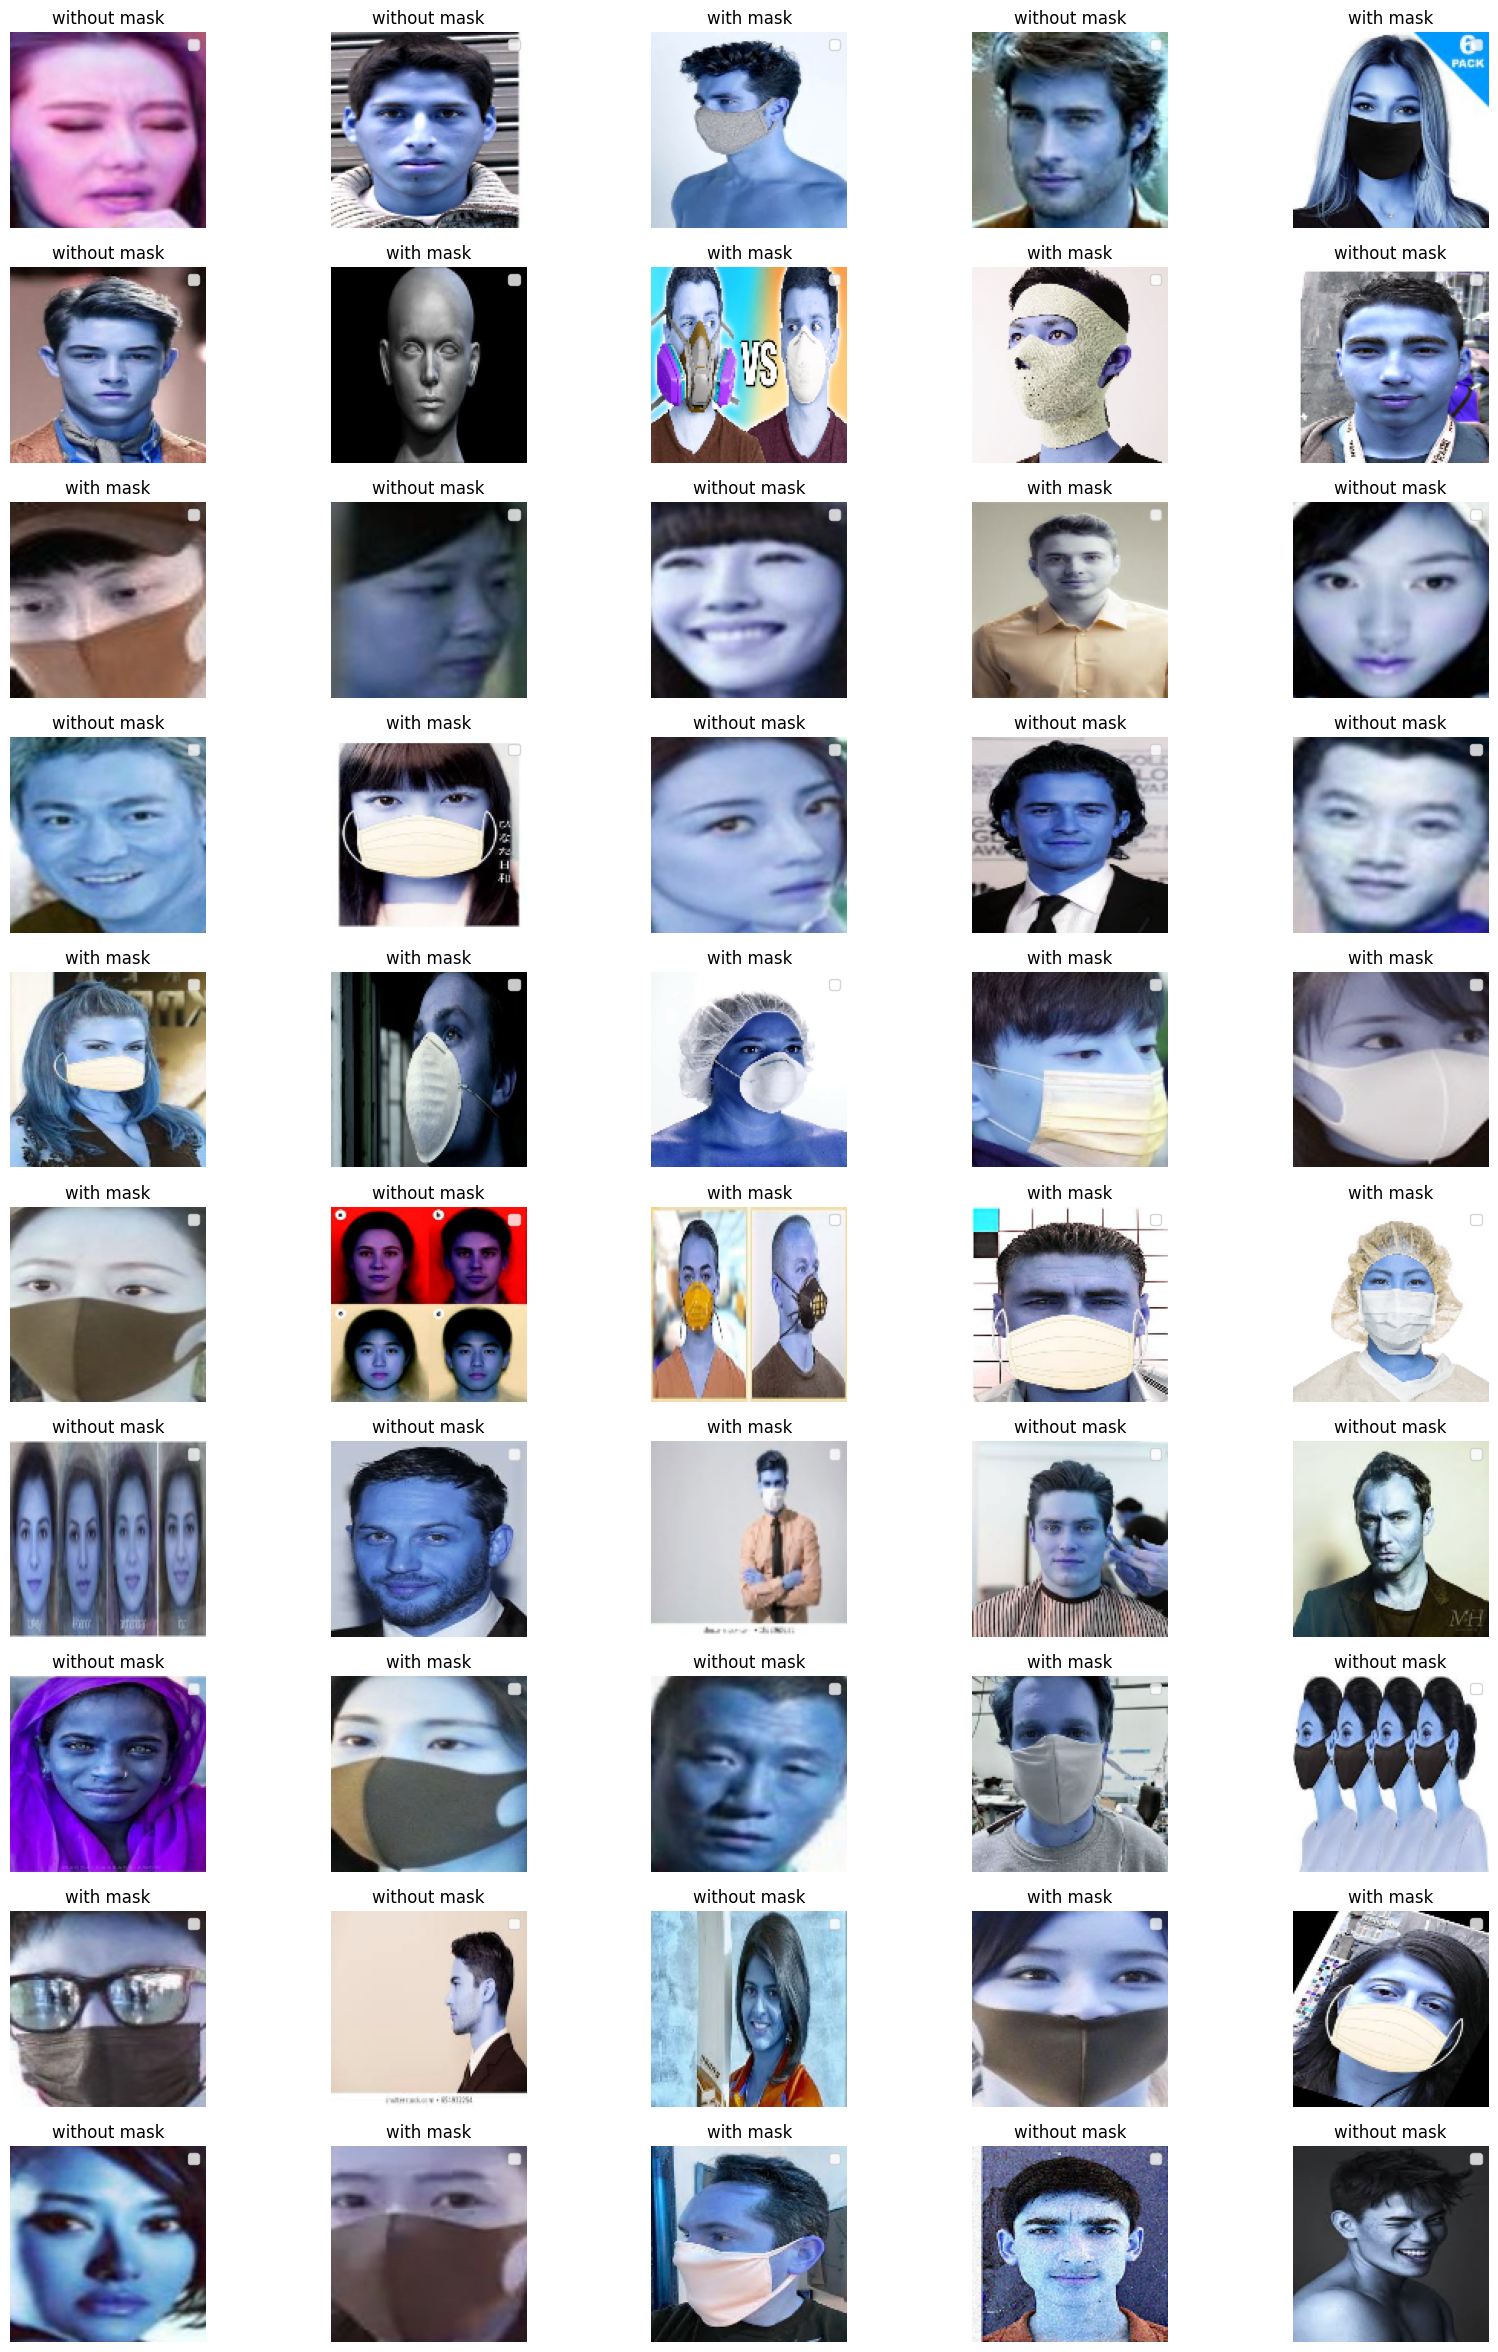

In [21]:
plt.figure(figsize=(20,30))
i=1
for img in X_test:
    if i==51:
        break
    plt.subplot(10,5,i)
    plt.imshow(img)
    plt.title(pred_label[i-1])
    plt.legend()
    i+=1
    plt.axis('off')

array([[538,  55],
       [ 33, 507]], dtype=int64)

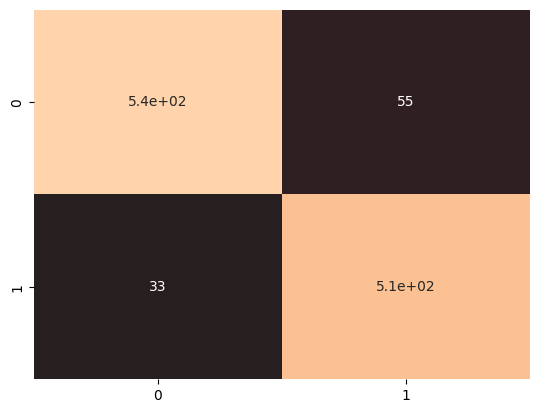

In [22]:
y_pred=[1 if m=='with mask' else 0 for m in pred_label]
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM, center = True,annot=True,cbar=False)
CM

In [23]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.94      0.91      0.92       593
           1       0.90      0.94      0.92       540

    accuracy                           0.92      1133
   macro avg       0.92      0.92      0.92      1133
weighted avg       0.92      0.92      0.92      1133

